<a href="https://colab.research.google.com/github/KangHyeonGu1/-/blob/main/team2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import scipy.stats as stats

In [3]:
data=pd.read_csv('teams.csv')
data.head()
rm = ols(' negtone~ dysfunc', data=data).fit()
rm.summary()
rm.params

Intercept    0.025682
dysfunc      0.619753
dtype: float64

In [4]:
ry = ols(' perform~ dysfunc + negtone', data=data).fit()
ry.summary()
ry.params

Intercept   -0.021764
dysfunc      0.441439
negtone     -0.534396
dtype: float64

In [5]:
ones=np.ones(shape=(60,3))
def dc(a,b):          
  c=a*b
  sum=c.sum()
  return sum

In [6]:
# 퍼지회구계수 추정을 위한 함수
def freg(data):
  df=data['dysfunc']
  xdf=pd.DataFrame({'a':df-0.05,'b':df,'c':df+0.05})
  x=xdf.to_numpy()
  net=data['negtone']
  mdf=pd.DataFrame({'a':net-0.05,'b':net,'c':net+0.05})
  m=mdf.to_numpy()
  per=data['perform']
  ydf=pd.DataFrame({'a':per-0.05,'b':per,'c':per+0.05})
  y=ydf.to_numpy()
  xtx=np.zeros(shape=(2,2))
  xlist=[ones,x]
  for i in range(0,2):    
    for j in range(0,2):
      xtx[i,j]= dc(xlist[i],xlist[j])
  xtm=np.zeros(shape=(2,1))
  for i in range(0,2):    
    for j in range(0,1):
      xtm[i,j]= dc(xlist[i],m)
  lxtx=np.linalg.inv(xtx)
  b=lxtx@xtm
  b=np.around(b, decimals=4)
  xtx2=np.zeros(shape=(3,3))
  xlist2=[ones,x,m]
  for i in range(0,3):    
    for j in range(0,3):
      xtx2[i,j]= dc(xlist2[i],xlist2[j])
  xty=np.zeros(shape=(3,1))
  for i in range(0,3):    
    for j in range(0,1):
      xty[i,j]= dc(xlist2[i],y)
  lxtx2=np.linalg.inv(xtx2)
  b2=lxtx2@xty
  b2=np.around(b2, decimals=4)
  b2 
  return b, b2


In [7]:
para=freg(data)

In [8]:
# sd 통계적 추론 
df=data['dysfunc']
xdf=pd.DataFrame({'a':df-0.05,'b':df,'c':df+0.05})
x=xdf.to_numpy()
net=data['negtone']
mdf=pd.DataFrame({'a':net-0.05,'b':net,'c':net+0.05})
m=mdf.to_numpy()
per=data['perform']
ydf=pd.DataFrame({'a':per-0.05,'b':per,'c':per+0.05})
y=ydf.to_numpy()

In [9]:
x_m=x.sum(axis=0)/60
x_m

array([-0.01533333,  0.03466667,  0.08466667])

In [10]:
d2=(x-x_m)**2
sd=np.sqrt(d2.sum()/59)
sd
se=sd/np.sqrt(60)
se

0.08310547379090802

In [11]:
m_m=m.sum(axis=0)/60
m_m
d2b=(m-m_m)**2
sdb=np.sqrt(d2b.sum()/59)
sdb
seb=sdb/np.sqrt(60)
seb

0.11748212389563038

In [12]:
# seab
seab=np.sqrt((para[0][1]**2*seb**2)+ (para[1][2]**2*se**2) + (se**2*seb**2) )
seab

array([0.08617409])

In [15]:
# a의 95% 신뢰구간과 z값 검정
a=para[0][1]
CI=[a-1.96*se,a+1.96*se]
z=a/se
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([0.46151327]), array([0.78728673])] [5.77315973e-14]


In [16]:
# b의 95% 신뢰구간과 z값 검정
b=para[1][2]
CI=[b-1.96*seb,b+1.96*seb]
z=b/seb
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([-0.76156496]), array([-0.30103504])] [6.11452211e-06]


In [17]:
# ab의 95% 신뢰구간과 z값 검정
ab=para[0][1]*para[1][2]
CI=[ab-1.96*seab,ab+1.96*seab]
z=ab/seab
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(CI,p)

[array([-0.50064493]), array([-0.16284251])] [0.00011827]


In [14]:
#부트스트랩 표본
a_boot=[None]*5000
c_boot=[None]*5000
b_boot=[None]*5000
for i in range(0,5000):
  new_data=data.sample(n=60,replace=True)
  parameters=freg(new_data)
  a_boot[i]= parameters[0][1]
  c_boot[i]= parameters[1][1]
  b_boot[i]= parameters[1][2]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


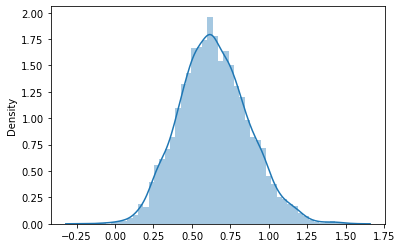

In [18]:
sns.distplot(a_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


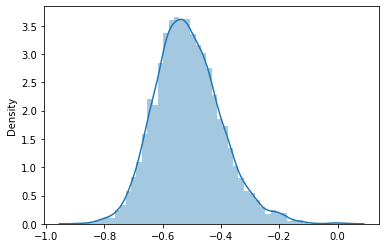

In [19]:
sns.distplot(b_boot)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


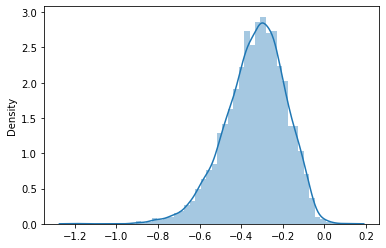

In [20]:
a_ar=np.array(a_boot)
b_ar=np.array(b_boot)
ab_boot=a_ar*b_ar
sns.distplot(ab_boot)

In [21]:
# a에 대한 부트스트랩 신뢰구간
a_boot.sort()
a=para[0][1]
al=(a_boot[124]+ a_boot[125])/2
au=(a_boot[4873]+a_boot[4874])/2
acl=[a- al*se,a + au*se]
acl

[array([0.60498656]), array([0.71641438])]

In [22]:
# b에 대한 부트스트랩 신뢰구간
b_boot.sort()
b=para[1][2]
bl=np.abs((b_boot[124]+ b_boot[125])/2)
bu=np.abs((b_boot[4873]+b_boot[4874])/2)
bcl=[b- bl*seb,b + bu*seb]
bcl

[array([-0.61514699]), array([-0.49983829])]

In [25]:
# 간접효과 ab에 대한 부트스트랩 신뢰구간
ab_boot.sort()
ab= a*b
abl=np.abs((ab_boot[124]+ ab_boot[125])/2)
abu=np.abs((ab_boot[4873]+ab_boot[4874])/2)
abcl=[ab- abl*seab,ab + abu*seab]
abcl


[array([-0.36430111]), array([-0.31090098])]